In [1]:
import pickle

with open("mnist_small.pkl", 'rb') as file:
    loaded_data = pickle.load(file)

In [4]:
import numpy as np

In [6]:
X = np.array(loaded_data['X'])
X.shape

(10000, 784)

In [8]:
Y = np.array(loaded_data['Y'])
Y.shape

(10000, 1)

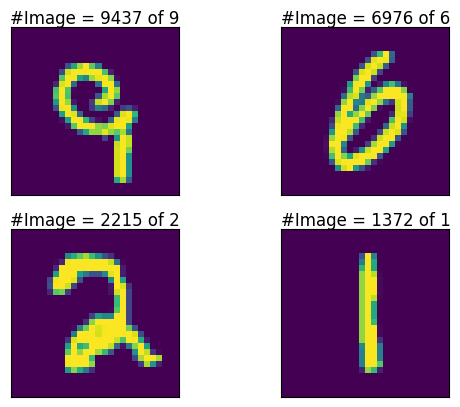

In [29]:
import matplotlib.pyplot as plt

count = 4
for i in range(count):
    index = np.random.randint(1,10000)    

    image = np.reshape(X[index],(28,28))
    plt.subplot(2,2,i+1)
    plt.imshow(image)
    plt.title(f"#Image = {index} of {Y[index][0]}",pad = 0.0,loc='center')
    plt.xticks([])
    plt.yticks([])

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_data = pca.fit_transform(X)

In [35]:
Y = np.reshape(Y,(-1,))

Text(0.5, 1.0, 'Digit Plot with PCA')

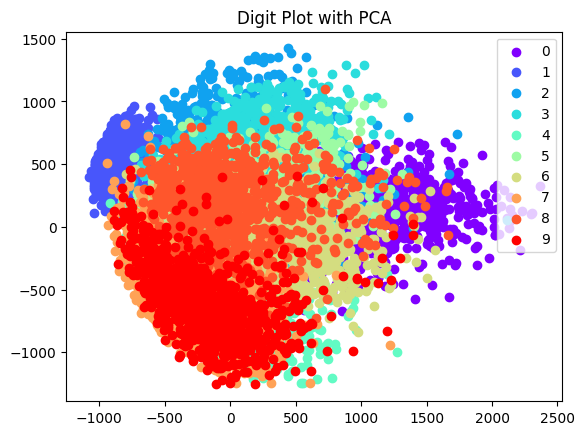

In [45]:
unique_labels = np.unique(Y)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for i, label in enumerate(unique_labels):
    mask = (Y == label)
    plt.scatter(pca_data[mask, 0], pca_data[mask, 1], c=[colors[i]], label=f'{label}')

plt.legend(loc='best')
plt.title('Digit Plot with PCA')


In [47]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

tsne_data = tsne.fit_transform(X)

Text(0.5, 1.0, 'Digit Plot with t-SNE')

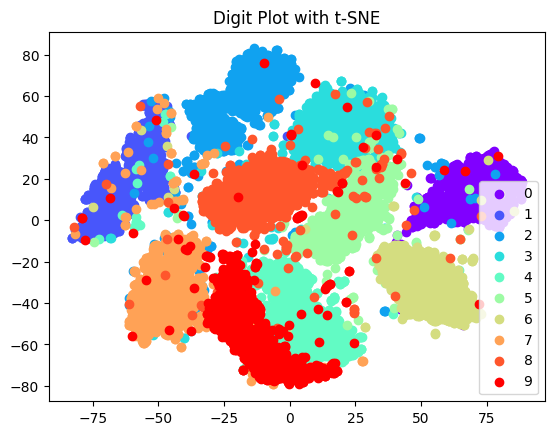

In [48]:
for i, label in enumerate(unique_labels):
    mask = (Y == label)
    plt.scatter(tsne_data[mask, 0], tsne_data[mask, 1], c=[colors[i]], label=f'{label}')

plt.legend(loc='best')
plt.title('Digit Plot with t-SNE')